In [11]:
import requests
from bs4 import BeautifulSoup
 
response = requests.get('http://www.weather.go.kr/weather/observation/currentweather.jsp')
soup = BeautifulSoup(response.content, 'html.parser')
 
table = soup.find('table', { 'class': 'table_develop3' })
data = []
for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))

    for td in tds:
        if td.find('a'):
            point = td.find('a').text
            temperature = tds[5].text
            feeltemp = tds[7].text
            humidity = tds[10].text
            data.append([point, temperature, feeltemp, humidity])
            
with open('weather.csv', 'w') as file:
    file.write('point,temperature,feeltemp,humidity\n')
    for i in data:
        file.write('{0},{1},{2},{3}\n'.format(i[0], i[1], i[2], i[3]))

In [12]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv', index_col='point', encoding='euc-kr')
df.groupby(['point'])

df

,temperature,feeltemp,humidity
point,,,
강릉,9.2,7.6,21
강진군,7.9,4.7,43
강화,3.5,1.6,39
거제,8.2,6.8,26
거창,7.2,7.2,18
...,...,...,...
합천,7.7,7.7,28
해남,6.9,6.0,50
홍성,4.4,2.2,50


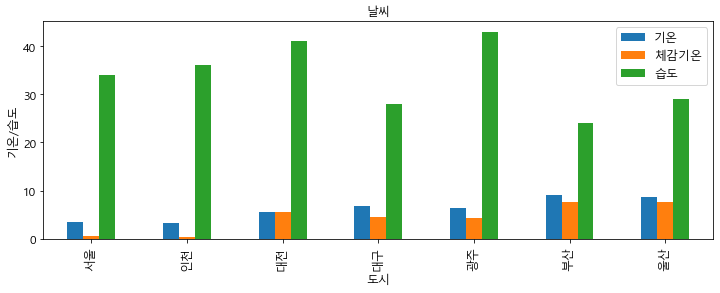

In [14]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
city_df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산', '울산']]
ax = city_df.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)
ax.set_ylabel('기온/습도', fontsize=12)
ax.legend(['기온', '체감기온' ,'습도'], fontsize=12)